In [2]:
# Basic Libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt # we only need pyplot
sb.set() # set the default Seaborn style for graphics

 # Data Preparation and Cleaning

In [3]:
# import csv dataset
employee=pd.read_csv('employee.csv')
employee

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,work_accident,promotion_last_5years,dept,salary
0,0.38,0.53,2.0,157.0,3.0,0.0,0.0,sales,low
1,0.80,0.86,5.0,262.0,6.0,0.0,0.0,sales,medium
2,0.11,0.88,7.0,272.0,4.0,0.0,0.0,sales,medium
3,0.72,0.87,5.0,223.0,5.0,0.0,0.0,sales,low
4,0.37,0.52,2.0,159.0,3.0,0.0,0.0,sales,low
...,...,...,...,...,...,...,...,...,...
15782,0.40,0.57,2.0,151.0,3.0,0.0,0.0,support,low
15783,0.37,0.48,2.0,160.0,3.0,0.0,0.0,support,low
15784,0.37,0.53,2.0,143.0,3.0,0.0,0.0,support,low
15785,0.11,0.96,6.0,280.0,4.0,0.0,0.0,support,low


In [4]:
# check data types
employee.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15787 entries, 0 to 15786
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  float64
 3   average_montly_hours   14999 non-null  float64
 4   time_spend_company     14999 non-null  float64
 5   work_accident          14999 non-null  float64
 6   promotion_last_5years  14999 non-null  float64
 7   dept                   14999 non-null  object 
 8   salary                 14999 non-null  object 
dtypes: float64(7), object(2)
memory usage: 1.1+ MB


In [5]:
#describe numeric response variable
employee['satisfaction_level'].describe()

count    14999.000000
mean         0.612834
std          0.248631
min          0.090000
25%          0.440000
50%          0.640000
75%          0.820000
max          1.000000
Name: satisfaction_level, dtype: float64

In [6]:
#describe numeric predictors
employee[['last_evaluation', 'number_project', 'average_montly_hours', 'time_spend_company']].describe()

,last_evaluation,number_project,average_montly_hours,time_spend_company
count,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.716102,3.803054,201.050337,3.498233
std,0.171169,1.232592,49.943099,1.460136
min,0.360000,2.000000,96.000000,2.000000
25%,0.560000,3.000000,156.000000,3.000000
50%,0.720000,4.000000,200.000000,3.000000
75%,0.870000,5.000000,245.000000,4.000000
max,1.000000,7.000000,310.000000,10.000000


In [7]:
#convert categorical predictors saved as numeric to categorical
employee['work_accident'] = employee['work_accident'].astype('category',copy=False)
employee['promotion_last_5years'] = employee['promotion_last_5years'].astype('category',copy=False)

#describe categorical predictors
employee[['work_accident', 'promotion_last_5years', 'dept', 'salary']].describe()

,work_accident,promotion_last_5years,dept,salary
count,14999.0,14999.0,14999,14999
unique,2.0,2.0,10,3
top,0.0,0.0,sales,low
freq,12830.0,14680.0,4140,7316


In [8]:
satisfaction = pd.DataFrame(employee['satisfaction_level'])
evaluation = pd.DataFrame(employee['last_evaluation'])
project = pd.DataFrame(employee['number_project'])
monthly_hours = pd.DataFrame(employee['average_montly_hours'])
time_spend = pd.DataFrame(employee['time_spend_company'])
work_accident = pd.DataFrame(employee['work_accident'])
promotion = pd.DataFrame(employee['promotion_last_5years'])
dept = pd.DataFrame(employee['dept'])
salary = pd.DataFrame(employee['salary'])

In [9]:
#finding the missing values  
missing_values = employee[employee.isna().any(axis=1)] 
display(missing_values.head()) 
display(missing_values.isna().count())

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,work_accident,promotion_last_5years,dept,salary
12783,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12784,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12785,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12786,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12787,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


satisfaction_level       788
last_evaluation          788
number_project           788
average_montly_hours     788
time_spend_company       788
work_accident            788
promotion_last_5years    788
dept                     788
salary                   788
dtype: int64

In [10]:
#remove rows with missing values
employee.dropna(inplace = True)

In [11]:
# check new number of rows
employee.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14999 entries, 0 to 15786
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   satisfaction_level     14999 non-null  float64 
 1   last_evaluation        14999 non-null  float64 
 2   number_project         14999 non-null  float64 
 3   average_montly_hours   14999 non-null  float64 
 4   time_spend_company     14999 non-null  float64 
 5   work_accident          14999 non-null  category
 6   promotion_last_5years  14999 non-null  category
 7   dept                   14999 non-null  object  
 8   salary                 14999 non-null  object  
dtypes: category(2), float64(5), object(2)
memory usage: 967.0+ KB


<Axes: >

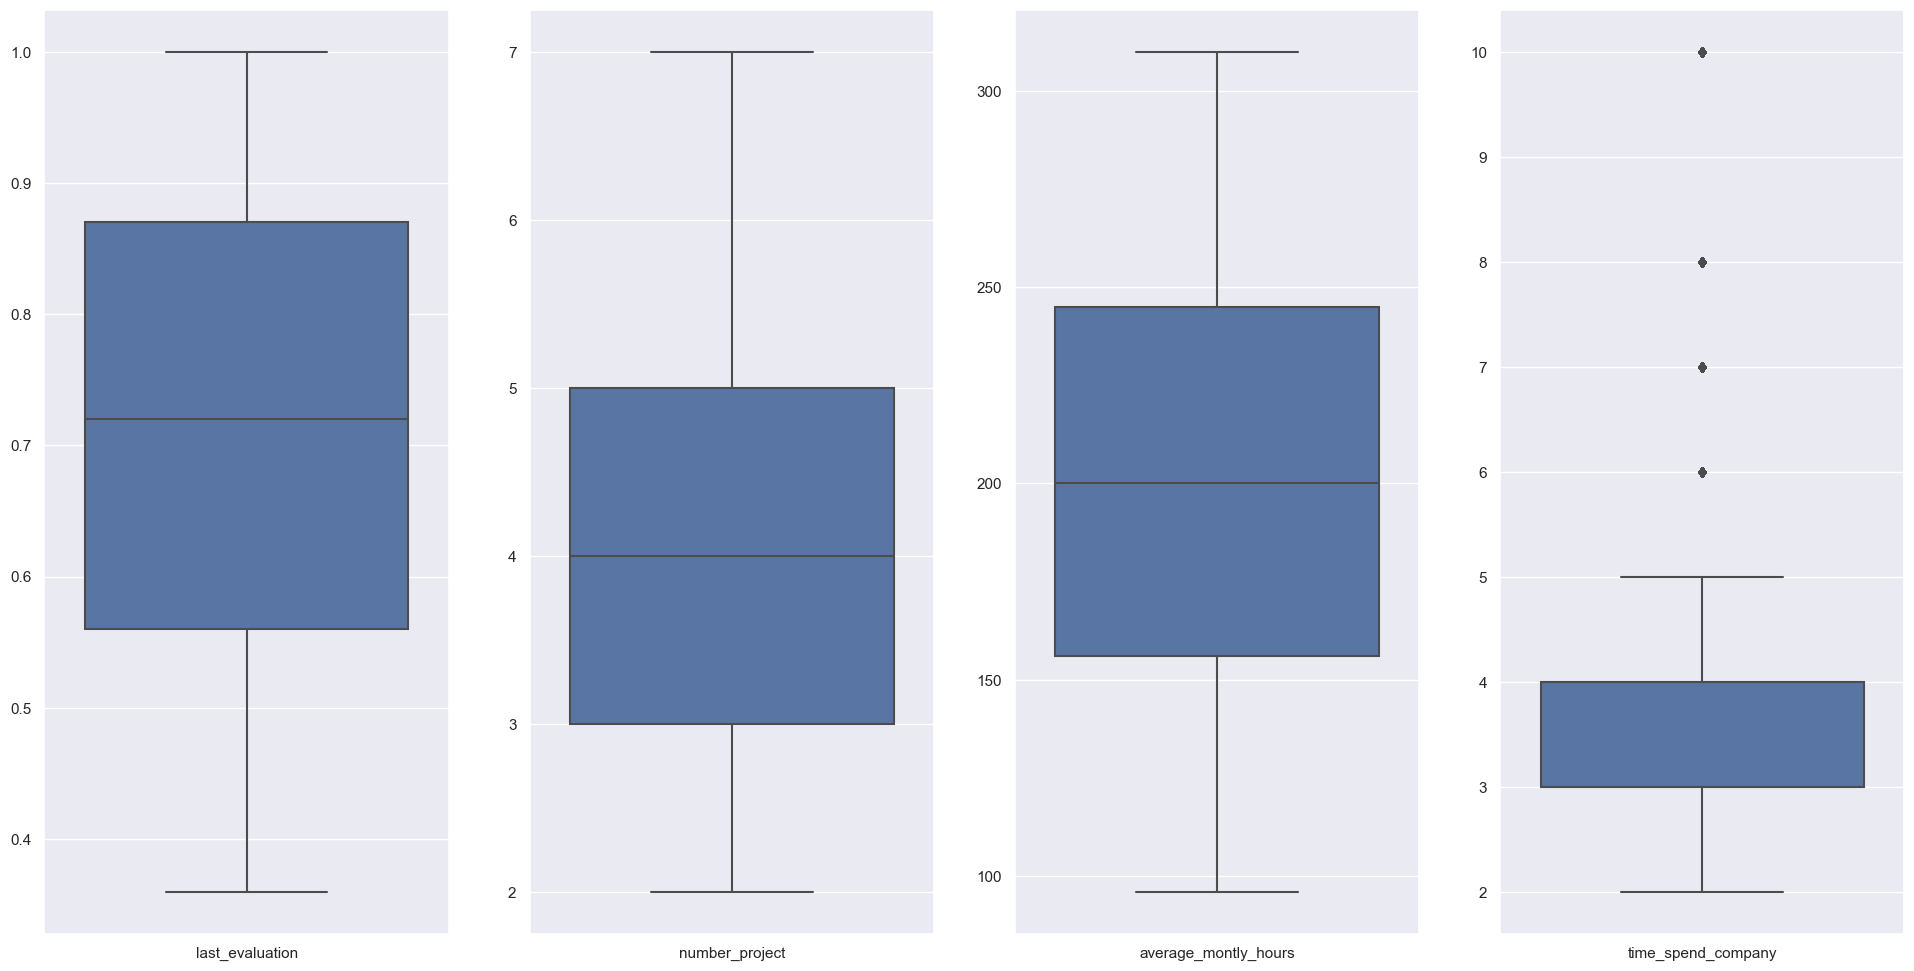

In [12]:
#Boxplot of numeric predictors to see outliers

f, axes = plt.subplots(1, 4, figsize=(24, 12))
sb.boxplot(data = evaluation, orient = "v", ax = axes[0])
sb.boxplot(data = project, orient = "v", ax = axes[1])
sb.boxplot(data = monthly_hours, orient = "v", ax = axes[2])
sb.boxplot(data = time_spend, orient = "v", ax = axes[3])

In [13]:
# define function to find outliers
def find_outliers_IQR(df):

    q1=df.quantile(0.25)
    q3=df.quantile(0.75)
    iqr=q3-q1
    lower_bound = q1 - (1.5 * iqr)
    upper_bound = q3 + (1.5 * iqr)
    outliers = [x for x in df if x <= lower_bound or x >= upper_bound]
    return outliers

In [14]:
find_outliers_IQR(employee['last_evaluation'])

[]

In [15]:
find_outliers_IQR(employee['number_project'])

[]

In [16]:
find_outliers_IQR(employee['average_montly_hours'])

[]

In [17]:
find_outliers_IQR(employee['time_spend_company'])

[6.0,
 6.0,
 6.0,
 6.0,
 6.0,
 6.0,
 6.0,
 6.0,
 6.0,
 6.0,
 6.0,
 6.0,
 6.0,
 6.0,
 6.0,
 6.0,
 6.0,
 6.0,
 6.0,
 6.0,
 6.0,
 6.0,
 6.0,
 6.0,
 6.0,
 6.0,
 6.0,
 6.0,
 6.0,
 6.0,
 6.0,
 6.0,
 6.0,
 6.0,
 6.0,
 6.0,
 6.0,
 6.0,
 6.0,
 6.0,
 6.0,
 6.0,
 6.0,
 6.0,
 6.0,
 6.0,
 6.0,
 6.0,
 6.0,
 6.0,
 6.0,
 6.0,
 6.0,
 6.0,
 6.0,
 6.0,
 6.0,
 6.0,
 6.0,
 6.0,
 6.0,
 6.0,
 6.0,
 6.0,
 6.0,
 6.0,
 6.0,
 6.0,
 6.0,
 6.0,
 6.0,
 6.0,
 6.0,
 6.0,
 6.0,
 6.0,
 6.0,
 6.0,
 6.0,
 6.0,
 6.0,
 6.0,
 6.0,
 6.0,
 6.0,
 6.0,
 6.0,
 6.0,
 6.0,
 6.0,
 6.0,
 6.0,
 6.0,
 6.0,
 6.0,
 6.0,
 6.0,
 6.0,
 6.0,
 6.0,
 6.0,
 6.0,
 6.0,
 6.0,
 6.0,
 6.0,
 6.0,
 6.0,
 6.0,
 6.0,
 6.0,
 6.0,
 6.0,
 6.0,
 6.0,
 6.0,
 6.0,
 6.0,
 6.0,
 6.0,
 6.0,
 6.0,
 6.0,
 6.0,
 6.0,
 6.0,
 6.0,
 6.0,
 6.0,
 6.0,
 6.0,
 6.0,
 6.0,
 6.0,
 6.0,
 6.0,
 6.0,
 6.0,
 6.0,
 6.0,
 6.0,
 6.0,
 6.0,
 6.0,
 6.0,
 6.0,
 6.0,
 6.0,
 6.0,
 6.0,
 6.0,
 6.0,
 6.0,
 6.0,
 6.0,
 6.0,
 6.0,
 6.0,
 6.0,
 6.0,
 6.0,
 6.0,
 6.0,
 6.0,
 6.0,
 6.0,
 6.0

In [18]:
#no. of outliers
len(find_outliers_IQR(employee['time_spend_company']))

1282

In [19]:
#remove outliers
print("Before: ", employee.shape)
for x in find_outliers_IQR(employee['time_spend_company']):
    index = employee[employee['time_spend_company'] == x].index
    employee = employee.drop(index)
print("After: ", employee.shape)

Before:  (14999, 9)
After:  (13717, 9)


In [20]:
# Export cleaned data to csv file
employee.to_csv('employee_cleaned.csv', index=False)  